In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:

# Укажите путь к родительской папке, содержащей папки indoor и outdoor
dataset_path = 'dataset'

# Параметры для генераторов изображений
img_height, img_width = 150, 150
batch_size = 32

# Создание генераторов изображений
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Генератор для обучающей выборки
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

# Генератор для валидационной выборки
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 328420 images belonging to 2 classes.
Found 82104 images belonging to 2 classes.


In [10]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\vikel\anaconda3\envs\my_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

c:\Users\vikel\anaconda3\envs\my_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
10264/10264 ━━━━━━━━━━━━━━━━━━━━ 3922s 382ms/step - accuracy: 0.8278 - loss: 0.3858 - val_accuracy: 0.8894 - val_loss: 0.2740
Epoch 2/10
10264/10264 ━━━━━━━━━━━━━━━━━━━━ 3872s 377ms/step - accuracy: 0.8935 - loss: 0.2670 - val_accuracy: 0.8998 - val_loss: 0.2512
Epoch 3/10
10264/10264 ━━━━━━━━━━━━━━━━━━━━ 3933s 383ms/step - accuracy: 0.9055 - loss: 0.2391 - val_accuracy: 0.9051 - val_loss: 0.2459
Epoch 4/10
10264/10264 ━━━━━━━━━━━━━━━━━━━━ 3898s 380ms/step - accuracy: 0.9131 - loss: 0.2228 - val_accuracy: 0.9112 - val_loss: 0.2276
Epoch 5/10
10264/10264 ━━━━━━━━━━━━━━━━━━━━ 3901s 380ms/step - accuracy: 0.9187 - loss: 0.2092 - val_accuracy: 0.9075 - val_loss: 0.2366
Epoch 6/10
10264/10264 ━━━━━━━━━━━━━━━━━━━━ 3932s 383ms/step - accuracy: 0.9223 - loss: 0.2000 - val_accuracy: 0.9072 - val_loss: 0.2433
Epoch 7/10
10264/10264 ━━━━━━━━━━━━━━━━━━━━ 3908s 381ms/step - accuracy: 0.9278 - loss: 0.1873 - val_accuracy: 0.9125 - val_loss: 0.2344
Epoch 8/10
10264/10264 ━━━━━━━━━━━━━━━━━━

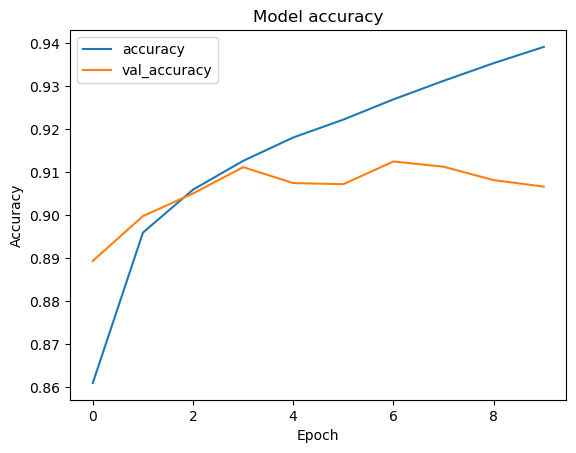

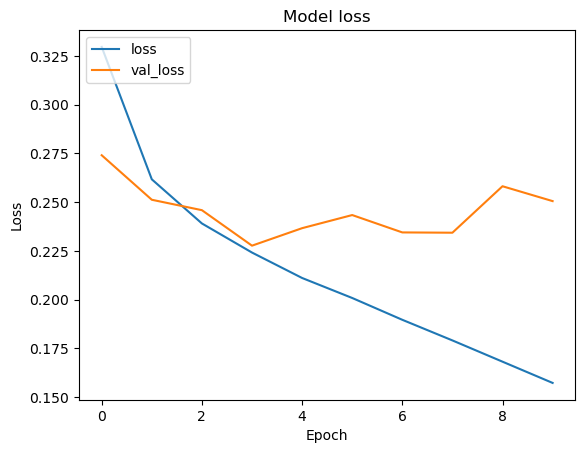

In [12]:
# Визуализация графиков обучения
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

2566/2566 ━━━━━━━━━━━━━━━━━━━━ 286s 112ms/step - accuracy: 0.9066 - loss: 0.2525
2566/2566 ━━━━━━━━━━━━━━━━━━━━ 284s 110ms/step
F1 Score: 0.4643157010915197


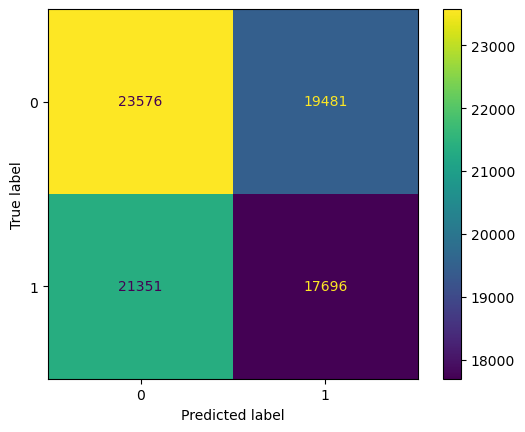

In [13]:
# Оценка на тестовой выборке
test_loss, test_accuracy = model.evaluate(validation_generator)

# Вычисление F1-score
y_true = validation_generator.classes
y_pred = model.predict(validation_generator)
y_pred_classes = (y_pred > 0.5).astype(int)

f1 = f1_score(y_true, y_pred_classes)
print(f"F1 Score: {f1}")

# Вывод матрицы путаницы
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,435,909 (77.96 MB)

 Trainable params: 6,811,969 (25.99 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,623,940 (51.97 MB)